<a href="https://www.kaggle.com/code/ashishkumarak/tf-idf-from-scratch-comparison-with-scikit-learn?scriptVersionId=170286153" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Consider the corpus as the list of documents

In [1]:
corpus = [
    'this is the first document document.',
    'this is the first ',
   'this document is the second document.',
    'and this is the third one.',
    'is this the first document?',
 ]

## TF : Term Frequency



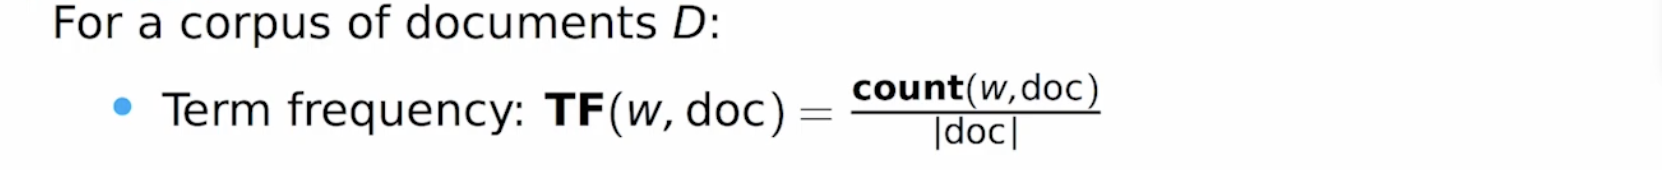

- count(w,doc) : Number of times the word w appears in document doc
- |doc| : Number of words in the document

First let's remove puctuation from texts and  get all the distinct words from the documents : 

In [2]:
import re
def remove_punctuation(text):
  """Removes all punctuation from a string.

  Args:
    text: The string to remove punctuation from.

  Returns:
    A string with all punctuation removed.
  """

  pattern = re.compile(r'[^\w\s]')
  return pattern.sub(' ', text)

print(remove_punctuation(corpus[0]))

this is the first document document 


Now let's get all the unique words from the corpus

In [3]:
unique_words = set()
for i in corpus : 
    only_txt = remove_punctuation(i)
    words = only_txt.split(' ')
    for j in range(len(words)-1) : 
        words[j] = words[j].lower()
        unique_words.add(words[j])   
unique_words_list = list(unique_words)
unique_words_list

['one', 'third', 'this', 'second', 'is', 'document', 'and', 'the', 'first']

#### Now this unique_words set is let's say the defining method for the (doc_id, word_index)
-> Word index for This : 0

-> Word index for document : 1
etc

We have two documents (TEXT lines) and let's say the index starts from 0
- Index for  'This is the first document.' : 0
- Index for  'This document is the second document.' : 1

#### Therefore count(0,1) means count of word "second" in the document "This is the first document"

### Calculating TF and storing them as a dictionary where keys are the tuples and values are the TF values

In [4]:
def tf(corpus) : 
    tf_dict = {}
    for i,doc in enumerate(corpus) : 
        txt = remove_punctuation(doc).split(' ')[:-1]
        len_doc = len(txt)
        for j, word in enumerate(unique_words_list) : 
                tf_dict[(i,j)] = txt.count(word)/len_doc
    return tf_dict

tf_dict = tf(corpus)

tf_dict

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.16666666666666666,
 (0, 3): 0.0,
 (0, 4): 0.16666666666666666,
 (0, 5): 0.3333333333333333,
 (0, 6): 0.0,
 (0, 7): 0.16666666666666666,
 (0, 8): 0.16666666666666666,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.25,
 (1, 3): 0.0,
 (1, 4): 0.25,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.25,
 (1, 8): 0.25,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.16666666666666666,
 (2, 3): 0.16666666666666666,
 (2, 4): 0.16666666666666666,
 (2, 5): 0.3333333333333333,
 (2, 6): 0.0,
 (2, 7): 0.16666666666666666,
 (2, 8): 0.0,
 (3, 0): 0.16666666666666666,
 (3, 1): 0.16666666666666666,
 (3, 2): 0.16666666666666666,
 (3, 3): 0.0,
 (3, 4): 0.16666666666666666,
 (3, 5): 0.0,
 (3, 6): 0.16666666666666666,
 (3, 7): 0.16666666666666666,
 (3, 8): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.2,
 (4, 3): 0.0,
 (4, 4): 0.2,
 (4, 5): 0.2,
 (4, 6): 0.0,
 (4, 7): 0.2,
 (4, 8): 0.2}

### Printing TF values


In [5]:
def print_words_tf():
    for l,k in tf_dict.keys() :  
        print(unique_words_list[k], tf_dict[(l,k)])
print_words_tf()

one 0.0
third 0.0
this 0.16666666666666666
second 0.0
is 0.16666666666666666
document 0.3333333333333333
and 0.0
the 0.16666666666666666
first 0.16666666666666666
one 0.0
third 0.0
this 0.25
second 0.0
is 0.25
document 0.0
and 0.0
the 0.25
first 0.25
one 0.0
third 0.0
this 0.16666666666666666
second 0.16666666666666666
is 0.16666666666666666
document 0.3333333333333333
and 0.0
the 0.16666666666666666
first 0.0
one 0.16666666666666666
third 0.16666666666666666
this 0.16666666666666666
second 0.0
is 0.16666666666666666
document 0.0
and 0.16666666666666666
the 0.16666666666666666
first 0.0
one 0.0
third 0.0
this 0.2
second 0.0
is 0.2
document 0.2
and 0.0
the 0.2
first 0.2


## IDF : Inverse Document Frequency


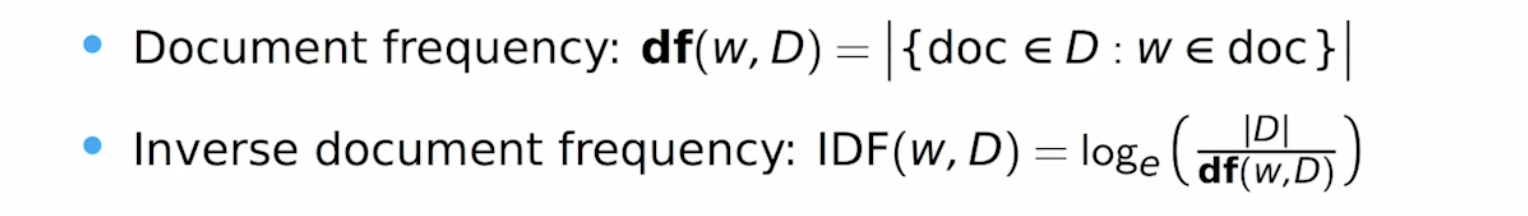

#### - Document Freqency df(w,D) : Number of documens that contains the target word w
#### - |D| : Total number of documents in the corpus

In [6]:
import numpy as np
import math

np.log(math.e)

1.0

In [7]:
def IDF(word) :
    count = 0 
    for doc in corpus :
        txt = remove_punctuation(doc).split(' ')[:-1]
        if word in txt :
            count+=1
    
    return np.log(len(corpus)/(count))

IDF_vals = []
idf_dict = {}
for k, word in enumerate(unique_words_list): 
    idf_dict[k]= IDF(word)
                
idf_dict

{0: 1.6094379124341003,
 1: 1.6094379124341003,
 2: 0.0,
 3: 1.6094379124341003,
 4: 0.0,
 5: 0.5108256237659907,
 6: 1.6094379124341003,
 7: 0.0,
 8: 0.5108256237659907}

### Printing the IDF values of the unique words

In [8]:
def print_words_idf():
    for i in range(len(unique_words_list)) : 
        print(unique_words_list[i], idf_dict[i])
print_words_idf()

one 1.6094379124341003
third 1.6094379124341003
this 0.0
second 1.6094379124341003
is 0.0
document 0.5108256237659907
and 1.6094379124341003
the 0.0
first 0.5108256237659907


## TF-IDF

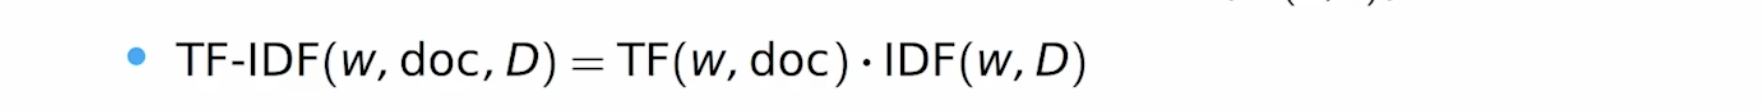

In [9]:
tf_idf_dict = {}
for wd_tuple in tf_dict.keys():
    tf_idf = tf_dict[wd_tuple]*idf_dict[wd_tuple[1]]
#     if tf_idf !=0 : 
    tf_idf_dict[wd_tuple] = tf_idf
        
tf_idf_dict

{(0, 0): 0.0,
 (0, 1): 0.0,
 (0, 2): 0.0,
 (0, 3): 0.0,
 (0, 4): 0.0,
 (0, 5): 0.1702752079219969,
 (0, 6): 0.0,
 (0, 7): 0.0,
 (0, 8): 0.08513760396099845,
 (1, 0): 0.0,
 (1, 1): 0.0,
 (1, 2): 0.0,
 (1, 3): 0.0,
 (1, 4): 0.0,
 (1, 5): 0.0,
 (1, 6): 0.0,
 (1, 7): 0.0,
 (1, 8): 0.12770640594149768,
 (2, 0): 0.0,
 (2, 1): 0.0,
 (2, 2): 0.0,
 (2, 3): 0.26823965207235,
 (2, 4): 0.0,
 (2, 5): 0.1702752079219969,
 (2, 6): 0.0,
 (2, 7): 0.0,
 (2, 8): 0.0,
 (3, 0): 0.26823965207235,
 (3, 1): 0.26823965207235,
 (3, 2): 0.0,
 (3, 3): 0.0,
 (3, 4): 0.0,
 (3, 5): 0.0,
 (3, 6): 0.26823965207235,
 (3, 7): 0.0,
 (3, 8): 0.0,
 (4, 0): 0.0,
 (4, 1): 0.0,
 (4, 2): 0.0,
 (4, 3): 0.0,
 (4, 4): 0.0,
 (4, 5): 0.10216512475319815,
 (4, 6): 0.0,
 (4, 7): 0.0,
 (4, 8): 0.10216512475319815}

## Comparison with scikit learn

1. TF calculation in scikit learn is done by just counting the occurence of words in the document
2. In IDF calculation, scikit-learn method add 1 after the log operation i.e. log(n/df) +1

In [10]:
def scikit_tf(corpus): 
    tf_dict = {}
    for i,doc in enumerate(corpus) : 
        txt = remove_punctuation(doc).split(' ')[:-1]
        for j, word in enumerate(unique_words_list) : 
                tf_dict[(i,j)] = txt.count(word) ## Just counting the word occurence
    return tf_dict
tf_dict_scikit = scikit_tf(corpus)
tf_dict_scikit

{(0, 0): 0,
 (0, 1): 0,
 (0, 2): 1,
 (0, 3): 0,
 (0, 4): 1,
 (0, 5): 2,
 (0, 6): 0,
 (0, 7): 1,
 (0, 8): 1,
 (1, 0): 0,
 (1, 1): 0,
 (1, 2): 1,
 (1, 3): 0,
 (1, 4): 1,
 (1, 5): 0,
 (1, 6): 0,
 (1, 7): 1,
 (1, 8): 1,
 (2, 0): 0,
 (2, 1): 0,
 (2, 2): 1,
 (2, 3): 1,
 (2, 4): 1,
 (2, 5): 2,
 (2, 6): 0,
 (2, 7): 1,
 (2, 8): 0,
 (3, 0): 1,
 (3, 1): 1,
 (3, 2): 1,
 (3, 3): 0,
 (3, 4): 1,
 (3, 5): 0,
 (3, 6): 1,
 (3, 7): 1,
 (3, 8): 0,
 (4, 0): 0,
 (4, 1): 0,
 (4, 2): 1,
 (4, 3): 0,
 (4, 4): 1,
 (4, 5): 1,
 (4, 6): 0,
 (4, 7): 1,
 (4, 8): 1}

In [11]:
def scikit_IDF(word) :
    count = 0 
    for doc in corpus :
        txt = remove_punctuation(doc).split(' ')[:-1]
        if word in txt :
            count+=1    
    return np.log((len(corpus)/(count)))+1 ##Adding 1 after log operation

IDF_vals = []
idf_dict = {}
for k, word in enumerate(unique_words_list): 
    idf_dict[k]= scikit_IDF(word)
                
idf_dict

{0: 2.6094379124341005,
 1: 2.6094379124341005,
 2: 1.0,
 3: 2.6094379124341005,
 4: 1.0,
 5: 1.5108256237659907,
 6: 2.6094379124341005,
 7: 1.0,
 8: 1.5108256237659907}

### Multiplying the TF & IDF values

In [12]:
tf_idf_dict = {}
for wd_tuple in tf_dict_scikit.keys():
    tf_idf = tf_dict_scikit[wd_tuple]*idf_dict[wd_tuple[1]] ## TF * IDF
    tf_idf_dict[wd_tuple] = tf_idf

### Creating a numpy array for storing the term document matrix with TF-IDF values

In [13]:
import pandas as pd
def transformation(corpus, idf_dict,tf_idf_dict): 
    my_df = pd.DataFrame()
    term_doc_array = np.zeros((len(corpus), len(idf_dict.keys())))
    for i in range(len(corpus)) : 
        for j in range(len(idf_dict.keys())) : 
            term_doc_array[i][j] = tf_idf_dict[(i,j)]
    return term_doc_array

term_doc_array = transformation(corpus, idf_dict,tf_idf_dict)

## Converting EVERYTHING into a class

In [14]:
class TF_IDF() : 
    def __init__(self) : 
        self.feature_names = None   
        
    def fit_transform(self, corpus) : 
        unique_words = set()
        for i in corpus : 
            only_txt = remove_punctuation(i)
            words = only_txt.split(' ')
            for j in range(len(words)-1) : 
                words[j] = words[j].lower()
                unique_words.add(words[j])   
        self.feature_names = list(unique_words)
        # TF
        tf_dict = {}
        for i,doc in enumerate(corpus) : 
            txt = remove_punctuation(doc).split(' ')[:-1]
            for j, word in enumerate(self.feature_names) : 
                    tf_dict[(i,j)] = txt.count(word) ## Just counting the word occurence
        # IDF
        IDF_vals = []
        idf_dict = {}
        for k, word in enumerate(self.feature_names): 
            count = 0 
            for doc in corpus :
                txt = remove_punctuation(doc).split(' ')[:-1]
                if word in txt :
                    count+=1    
            idf_dict[k]= np.log((len(corpus)/(count)))+1
        tf_idf_dict = {}
        for wd_tuple in tf_dict_scikit.keys():
            tf_idf = tf_dict_scikit[wd_tuple]*idf_dict[wd_tuple[1]] ## TF * IDF
            tf_idf_dict[wd_tuple] = tf_idf
        return tf_idf_dict
        
             
    def print_feature_names(self):
        return self.feature_names
        
        

tf_idf_instance = TF_IDF() 
X = tf_idf_instance.fit_transform(corpus)
tf_idf_instance.print_feature_names()

['one', 'third', 'this', 'second', 'is', 'document', 'and', 'the', 'first']

In [15]:
print(X)

{(0, 0): 0.0, (0, 1): 0.0, (0, 2): 1.0, (0, 3): 0.0, (0, 4): 1.0, (0, 5): 3.0216512475319814, (0, 6): 0.0, (0, 7): 1.0, (0, 8): 1.5108256237659907, (1, 0): 0.0, (1, 1): 0.0, (1, 2): 1.0, (1, 3): 0.0, (1, 4): 1.0, (1, 5): 0.0, (1, 6): 0.0, (1, 7): 1.0, (1, 8): 1.5108256237659907, (2, 0): 0.0, (2, 1): 0.0, (2, 2): 1.0, (2, 3): 2.6094379124341005, (2, 4): 1.0, (2, 5): 3.0216512475319814, (2, 6): 0.0, (2, 7): 1.0, (2, 8): 0.0, (3, 0): 2.6094379124341005, (3, 1): 2.6094379124341005, (3, 2): 1.0, (3, 3): 0.0, (3, 4): 1.0, (3, 5): 0.0, (3, 6): 2.6094379124341005, (3, 7): 1.0, (3, 8): 0.0, (4, 0): 0.0, (4, 1): 0.0, (4, 2): 1.0, (4, 3): 0.0, (4, 4): 1.0, (4, 5): 1.5108256237659907, (4, 6): 0.0, (4, 7): 1.0, (4, 8): 1.5108256237659907}


### 1. MY CODED OUTPUT

In [16]:

my_df = pd.DataFrame(term_doc_array, columns = unique_words_list)
my_df

,one,third,this,second,is,document,and,the,first
0,0.000000,0.000000,1.0,0.000000,1.0,3.021651,0.000000,1.0,1.510826
1,0.000000,0.000000,1.0,0.000000,1.0,0.000000,0.000000,1.0,1.510826
2,0.000000,0.000000,1.0,2.609438,1.0,3.021651,0.000000,1.0,0.000000
3,2.609438,2.609438,1.0,0.000000,1.0,0.000000,2.609438,1.0,0.000000
4,0.000000,0.000000,1.0,0.000000,1.0,1.510826,0.000000,1.0,1.510826


### TF-IDF calculation based on Scikit-learn's TfidfVectorizer

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(smooth_idf = False, norm = None)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third',
       'this'], dtype=object)

### 2. SCIKIT LEARN'S OUTPUT

In [18]:
df = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names_out())
df

,and,document,first,is,one,second,the,third,this
0,0.000000,3.021651,1.510826,1.0,0.000000,0.000000,1.0,0.000000,1.0
1,0.000000,0.000000,1.510826,1.0,0.000000,0.000000,1.0,0.000000,1.0
2,0.000000,3.021651,0.000000,1.0,0.000000,2.609438,1.0,0.000000,1.0
3,2.609438,0.000000,0.000000,1.0,2.609438,0.000000,1.0,2.609438,1.0
4,0.000000,1.510826,1.510826,1.0,0.000000,0.000000,1.0,0.000000,1.0


- SCIKIT LEARN'S OUTPUT and MY CODED OUTPUT matches
- Can try different versions of calculating TF and IDF on your choice

Important points : 
- Need to convert entire document to lowercase before applying this task


## References : 
1. https://www.youtube.com/watch?v=D3yL63aYNMQ&ab_channel=StanfordOnline